In [1]:
#Load the required libraries

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
#Load the data
obesity = pd.read_csv('ObesityDataSet.csv')

In [3]:
#Map categorical values to numerical values
obesity['Gender'] = obesity['Gender'].map({'Female': 0, 'Male':1})
obesity['family_history_with_overweight'] = obesity['family_history_with_overweight'].map({'no': 0, 'yes':1})
obesity['FAVC'] = obesity['FAVC'].map({'no': 0, 'yes':1})
obesity['CAEC'] = obesity['CAEC'].map({'no': 0, 'Sometimes':1, 'Frequently':2, 'Always':3})
obesity['SMOKE'] = obesity['SMOKE'].map({'no': 0, 'yes':1})
obesity['SCC'] = obesity['SCC'].map({'no': 0, 'yes':1})
obesity['CALC'] = obesity['CALC'].map({'no': 0, 'Sometimes':1, 'Frequently':2, 'Always':3})
obesity['MTRANS'] = obesity['MTRANS'].map({'Walking': 0, 'Public_Transportation':1, 'Bike':2, 'Motorbike':3, 'Automobile':4})

In [4]:
#View the first 5 rows of the dataset to ensure that the mapping was applied correctly
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObesity
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,1,Overweight_Level_II


In [5]:
# Split the data into features (X) and target (y)
X = obesity.drop('NObesity', axis=1)
y = obesity['NObesity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
#Train the model using the training sets
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [7]:
#Check the evaluation metrics of the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)

Accuracy: 94.32624113475178
Precision: 94.35403071223966
Recall: 94.0677292935367


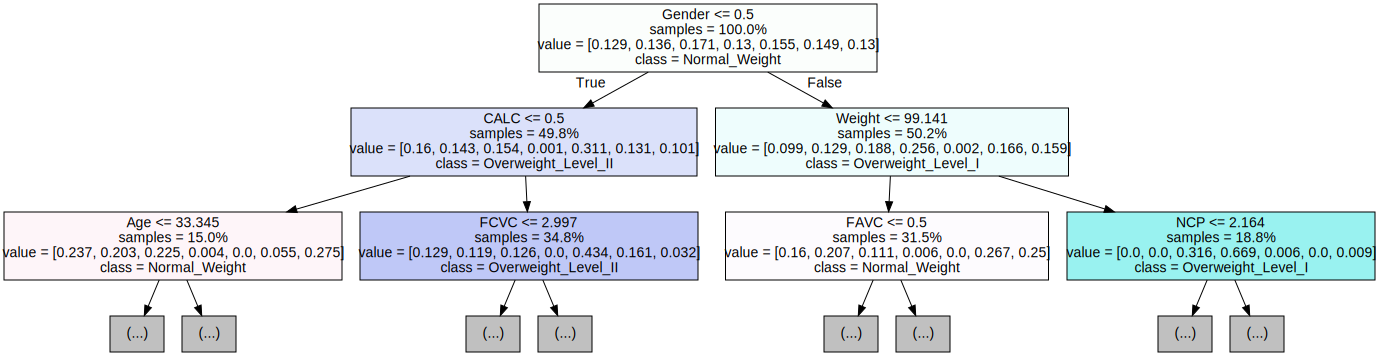

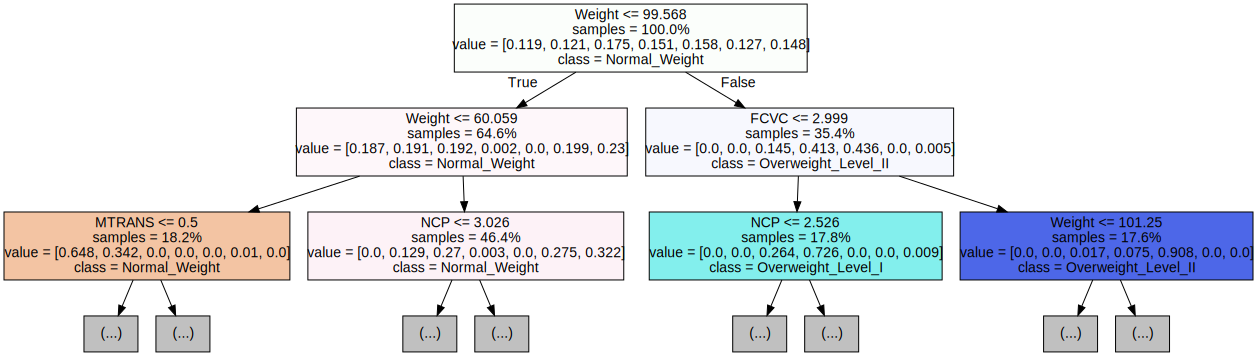

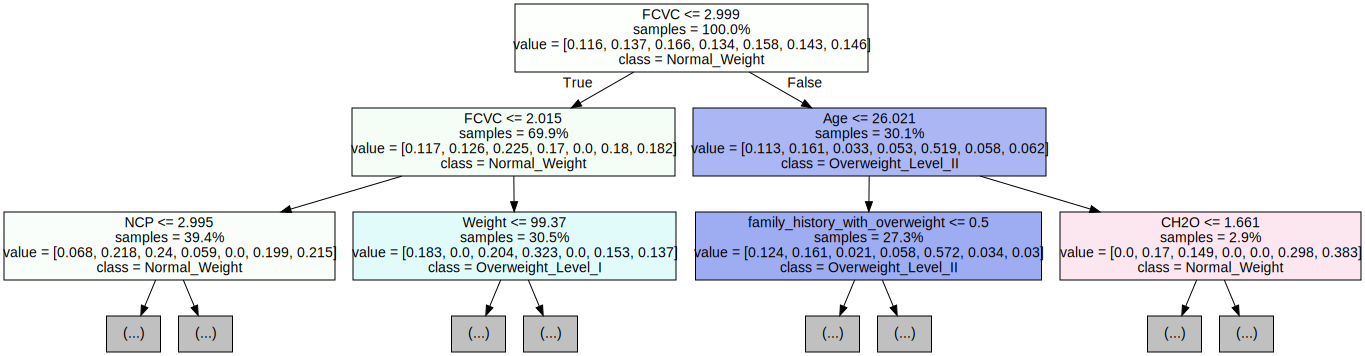

In [8]:
#Visualize the first 3 trees
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               class_names=y,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)